# Estatísticas descritivas

O que podemos aprender com os dados que coletamos? Quais inferências estão de fato autorizadas? Nesta aula, veremos os fundamentos da estatística descritiva e como podemos usá-los para extrair conhecimento de um conjunto de informações.

### Material de apoio

Leitura sugerida:

1. An Introduction to Empirical Legal Research. Epstein & Martin. Capítulo 6


## Métricas de centralidade

Com frequência, falamos da média quando estamos discutindo dados. É comum ler discussões sobre a [renda *média* das pessoas](https://istoe.com.br/renda-media-e-de-r-5-42670-mas-1-5-dos-recursos-estao-concentrados-diz-ibge/), sobre o [período *médio* de incubação de um vírus](https://noticias.r7.com/saude/periodo-medio-de-incubacao-do-coronavirus-e-de-51-dias-10032020), sobre o [tempo *médio* até a sentença](https://exame.abril.com.br/brasil/quanto-tempo-a-justica-do-brasil-leva-para-julgar-um-processo/)...

A maioria sabe intuitiva e matemáticamente o que é uma média aritimética. Para saber a média de renda de um grupo de 10 pessoas, por exemplo, somamos a renda das 10 pessoas e dividimos esse valor por 10.

O que menos pessoas sabem é que a média é apenas uma de diversas **métricas de centralidade** que permitem descrever um conjunto de dados.

Outras métricas de centralidade importantes e extremamente relevantes para o direito são a **mediana** e a **moda**. Em algumas circunstâncias, as três métricas de centralidade convergem e dão informações semelhantes. Em outras, elas dão informações extremamente diferentes.

Antes de entrar no caso e explicar como cada métrica é calculada, devemos nos perguntar qual nosso objetivo ao fazermos uma média? O que queremos fazer quando calculamos essas estatísticas de centralidade, ou de dispersão?

Partimos de uma vasta quantidade de linhas, centenas ou milhares de observações diferentes. Não temos capacidade de compreender toda essa informação se tentarmos, mas precisamos de formas de fazer afirmações e entender esses dados.

É justamente para essa tarefa que usamos estatísticas descritivas, queremos fazer afirmações sobre algum aspectos desse conjunto de dados. Nosso objetivo principal é a sumarização dos dados. A partir de uma medida comunicar um resumo do que acontece em toda essa massa de dados.

Estatísticas não são nosso único recurso nessa tarefa, e representações gráficas voltadas para distribuição são também extremamente úteis. Abordamos essas técnicas ao falarmos de visualização de dados. Agora, vamos abordar as estatísticas descritivas.

## O caso

Para ilustrar a importância conceitual dessas três métricas, vamos usar dados para responder a uma pergunta que é do interesse dos praticantes do direito constitucional: quanto tempo deve levar para que o STF julgue a minha liminar em uma ADI?

Para isso, vamos carregar um conjunto de dados que foi retirado da base usada em relatórios do projeto Supremo em Números. Aqui, coletamos informação sobre liminares em ADIs ajuízadas no STF até o ano de 2019.

In [ ]:
import pandas as pd

In [7]:
dias_para_liminar = pd.read_csv(
    "https://bit.ly/liminares-ADIn",
    parse_dates=["protocolo", "liminar"] # aqui informamos quais colunas o pandas deve interpretar como data
)

dias_para_liminar.head()

,id,classe,numero,protocolo,liminar
0,5569,ADI,2113,1999-12-02,2000-03-16
1,5604,ADI,2102,1999-11-18,2000-02-16
2,11299,ADI,2135,2000-01-27,2007-08-02
3,11797,ADI,4177,2008-12-18,2009-08-12
4,11807,ADI,4282,2009-08-10,2009-08-14


In [ ]:
dias_para_liminar.shape

(2926, 6)

Pronto! Temos as datas de protocolo e da primeira decisão liminar de 2.926 processos que foram julgados pelo STF.

Esses dados, porém, são pouco informativos. Queremos saber **quanto tempo** se passou entre as duas datas. E isso pode ser informado por uma única métrica que diga quantos dias se passaram entre elas, por exemplo. Podemos usar o Pandas para calcular esses dados. Já que nossos dados estão expressos de maneira canônica como objetos do tipo `datetime`, basta subtrair a maior data da menor!

Vamos gerar uma coluna com a diferença entre a data de protocolo e julgamento da liminar nos casos.

In [8]:
dias_para_liminar["diferenca_em_dias"] = dias_para_liminar["liminar"] - dias_para_liminar["protocolo"]
dias_para_liminar.diferenca_em_dias.describe()

count                           2926
mean     163 days 23:02:54.709501026
std      529 days 20:39:55.762561776
min                  0 days 00:00:00
25%                  7 days 00:00:00
50%                 28 days 00:00:00
75%                106 days 00:00:00
max               7749 days 00:00:00
Name: diferenca_em_dias, dtype: object

Diminuindo as duas colunas, temos o tempo para cada decisão. O describe oferece um resumo estatístico muito rico da coluna. Vamos a partir de agora ver individualmente o que cada métrica nos informa, e como calculá-las.

Se observamors os resultados, temos informações altamente detalhadas sobre o transtorno de tempo. Isso inclui horas e minutos para variação.

Como queremos fazer cálculos estatísticos com os dados de `diferenca_em_dias`, o mais simples é expressá-la apenas como números inteiros de dias, o que podemos fazer usando o método `.dt.days`.

Assim como podemos usar métodos de string usando o formato `.str`podemos usar métodos destinados para data com `.dt`.

In [11]:
dias_para_liminar["diferenca_em_dias"] = dias_para_liminar["diferenca_em_dias"].dt.days
dias_para_liminar.head()

,id,classe,numero,protocolo,liminar,diferenca_em_dias
0,5569,ADI,2113,1999-12-02,2000-03-16,105
1,5604,ADI,2102,1999-11-18,2000-02-16,90
2,11299,ADI,2135,2000-01-27,2007-08-02,2744
3,11797,ADI,4177,2008-12-18,2009-08-12,237
4,11807,ADI,4282,2009-08-10,2009-08-14,4


Municiados da diferença em dias de cada um dos processos como números inteiros, podemos simplesmente verificar qual é a média usando o método `.mean()`, nativo de `DataFrames`:

In [12]:
dias_para_liminar["diferenca_em_dias"].mean()

163.96035543403966

A média de dias entre início do processo e a primeira decisão liminar é de 165,18 dias! Podemos concluir, portanto, que o STF demora horrores para tomar uma decisão inicial mesmo nos processos de controle concentrado de constitucionalidade, que são movidos por figuras poderosas e envolvem questões importantíssimas, que interferem na vida de todos os brasileiros. Certo? Bem... Nem tanto!

Uma boa maneira de investigar dados numéricos, como a diferença em dias entre duas datas, é representando visualmente a **distribuição** dos valores. Podemos fazer isso através de histogramas. Novamente, o Pandas facilita nossa vida com um método nativo: `.hist()`:

<AxesSubplot: >

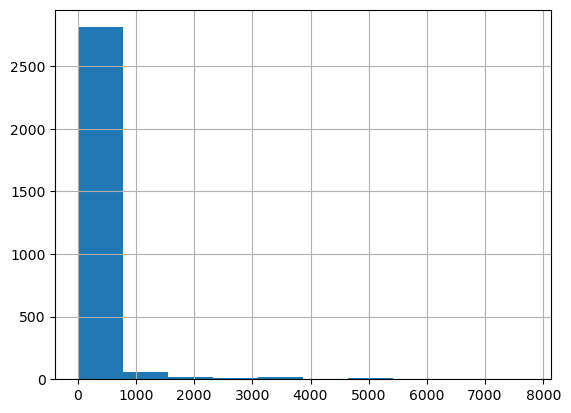

In [ ]:
dias_para_liminar["diferenca_em_dias"].hist()

**Histogramas** verificam a frequência com a qual diferentes valores aparecem nos nossos dados. A frequência é representada através de barras que incorporam intervalos de valores. 

Assim, o histograma acima nos informa que existem um pouco menos de 2.500 processos nos quais o intervalo de tempo entre o protocolo e a primeira decisão liminar foi entre 0 e algo proximo a 800 dias. Esse intervalo, como podemos perceber, é muito longo e talvez seja pouco informativo. `.hist()` tem um argumento chamado `bins`, que estabelece o número de barras que devem ser desenhadas. O padrão de 10 barras é adequado para descrever certos tipos de dados, mas parece inadequado para vermos o que está acontecendo no nosso dataset. Vamos plotar o mesmo gráfico com 100 barras:

<AxesSubplot: >

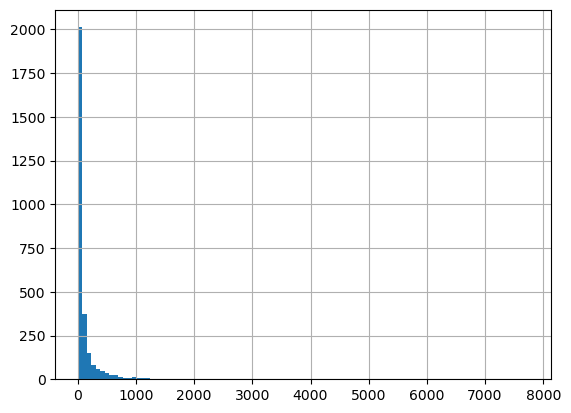

In [14]:
dias_para_liminar["diferenca_em_dias"].hist(bins = 100)

Podemos perceber que a esmagadora maioria dos casos tem uma diferença em poucos dias, e quase a integralidade dos casos em até 1000 dias, mas apenas uma minoria muito pequena passa dos 1.000 dias (ainda bem!).

Em quantos processos o intervalo de tempo foi maior do que 1000 dias? Podemos respodner facilmente:

In [16]:
dias_para_liminar.query("diferenca_em_dias > 1000").shape

(90, 6)

Em apenas 90 processos, a diferença foi maior do que 1000 dias. O que acontece com a média caso ignoremos esses casos?

In [18]:
dias_para_liminar.query("diferenca_em_dias < 1000")["diferenca_em_dias"].mean()

87.55359661495064

A média já caiu para 87,55 dias! Isso nos ensina uma lição importante sobre a média: ela é muito sensível a valores extremos. Se em alguns poucos processos, por algum motivo, a decisão demora mais de 10 anos para ser prolatada, isso terá um impacto muito significativo sobre a média, ainda que não nos diga muito sobre as práticas institucionais mais frequentes do tribunal.

## Mediana

Em dados cuja *distribuição* é tão extrema quanto a diferença em dias entre protocolo e liminares no controle concentrado do STF, é interessante verificar qual é a **mediana**, ou seja, qual aquele valor que ocupa a posição do meio entre os dados.

In [ ]:
dias_para_liminar["diferenca_em_dias"].median()

28.0

A diferença é brutal! Enquanto a média era de 163,96 dias, a mediana do STF é de apenas 28 dias. Não estamos demorando tanto assim!

Enquanto mais da metade dos casos são decididos em apenas um mês, os demais casos *puxam* a média para um valor muito mais elevado. A mediana, por outro lado, é robusta a esses valores extremos.

Para encontrar a mediana, ordenamos todos os números do primeiro até o enésimo lugar em termos de tamanho. A mediana será o número que ocupa a posição do meio.

Imagine que tivéssemos apenas 9 números:

1 - 83

2 - 98

3 - 2

4 - 2.454

5 - 93

6 - 12

7 - 5

8 - 185

9 - 8

Para obtermos a média, precisamos somar todos os valores e dividir o resultado por 9, que é o número de itens que temos. Podemos implementar isso de maneira simples em Python:

In [23]:
import numpy as np
numeros_test = [83, 98, 2, 2454, 93, 12, 5, 185, 8]
np.sum(numeros_test)

2940

Dividindo esse número por 9, chegamos a 326,6.

In [24]:
sum(numeros_test) / len(numeros_test)

326.6666666666667

De maneira direta, podemos usar a função `np.mean()` para verificar nosso resultado:

In [25]:
np.mean(numeros_test)

326.6666666666667

Se, por outro lado, queremos saber qual é a mediana, precisamos **ordenar** nossos dados e selecionar aquele que está na posição do meio, no nosso caso, aquele que ocupa a **5ª posição**:

1 - 2 

2 - 5 

3 - 8

4 - 12 

**5 - 83**

6 - 93

7 - 98

8 - 185

9 - 2.454

In [26]:
np.median(numeros_test)

83.0

Assim, sabemos que **metade dos dados** está abaixo da mediana e a outra metade está acima. Assim, 50% das ADIs e ADPFs no STF têm suas liminares decididas em 32 dias ou menos. Da mesma forma, sabemos que metade dos dados se encontra do outro lado da mediana.

O que acontece quando temos empates? Nesses casos, tiramos a média entre os 2 itens do meio. Vamos imaginar que adicionamos um novo item à nossa lista, o número 3.000:

1 - 2 

2 - 5 

3 - 8

4 - 12 

**5 - 83**

**6 - 93**

7 - 98

8 - 185

9 - 2.454

10 - 3.000

Agora, com um número par de itens, não temos mais um "ranking do meio". Nesse caso, os números de ranking 5 e 6 são igualmente centrais na nossa distribuição. Nesses casos, a mediana será determinada pela média entre esses dois números. No caso: (83 + 93) / 2 = 88.

In [27]:
numeros_test.append(3000)
np.median(numeros_test)

88.0

Esse exemplo também é interessante para vermos o quão marginal é o efeito de dados muito desbalanceados sobre a mediana e o quão grande é o efeito sobre a média. Incluímos o maior número da nossa série como seu 10º elemento: 3.000. Isso aumentou a mediana, mas por um valor muito pequeno, ela foi de 83 para 88. A média, por outro lado, cresceu significativamente (antes da adição, média = 326,67):

In [28]:
np.mean(numeros_test)

594.0

## Moda

Algumas vezes, não queremos saber qual é a média, nem qual é a mediana, mas sim qual o valor mais frequentemente assumido pela variável de interesse. Nesses casos, estamos perguntando pela **moda**. Se fizermos uma tabela contendo todos os intervalos entre protocolo e primeira decisão liminar e ordenarmos a tabela pelo número de ocorrências, teremos a moda do nosso valor. Para ilustrar, vamos usar o método `.value_counts()`:

In [ ]:
dias_para_liminar["diferenca_em_dias"].value_counts().sort_values(ascending = False).head()

1    132
2    117
6    107
7    103
5     92
Name: diferenca_em_dias, dtype: int64

Em 132 ocasiões, a diferença em dias entre protocolo e liminar foi de um único dia e essa é a diferença mais frequente. Para confirmar essa informação, vamos usar o método `.mode()`, nativo de `Series`:

In [114]:
dias_para_liminar["diferenca_em_dias"].mode()

0    1
dtype: int64

Reparem que o resultado do método `.mode()` é uma série. Por que isso acontece?

Porque um número pode ter mais de uma moda! Dois valores diferentes podem aparecer nos dados a mesma quantidade de vezes.

O uso da moda é mais comum quando tratamos de valores não numéricos, podendo representar, por exemplo, uma característica da unidade sob análise. Um exemplo, seria em um dataset mais amplo analisar a moda da classe processual.

## Entendendo a relação entre média, moda e mediana

Em alguns casos, essas três métricas vão ser muito similares. É o que acontece quando lidamos, por exemplo, com uma distribuição normal (veremos mais sobre isso nas próximas aulas). O gráfico abaixo mostra três possibilidades: 

*Negatively (or Left) skewed* ou distorcido à esquerda; Simétrico; e *Positively (or Right) skewed* ou distorcido à direita.

<br>
<br>
    <img src= https://i.stack.imgur.com/TOsq9.png style = "width:75%">
    <center> <i> Distribuições, média, moda e mediana. Fonte: <a href = "https://stats.stackexchange.com/questions/326304/in-a-given-set-of-numbers-can-there-be-more-than-half-above-mean-median-or-mode"> Resposta do usuário A.G., Stackexchange </a> </i> </center>
<br>
<br>



O gráfico do tempo até a decisão liminar segue justamente o padrão de "Right skewed" ou distorcido à direita, com apenas uma pequena ocorrência de valores muito altos. Nesses casos, como vimos, a média é puxada para cima.

## Métricas de Dispersão

Outra informação importante diz respeito à dispersão dos dados. Podemos ter um conjunto de dados que varia muito ou muito pouco, mesmo que média, moda e mediana permaneçam parecidas ou idênticas.

Por exemplo, vamos considerar essas três séries diferentes.

In [ ]:
serie1 = pd.Series([7, 7, 7, 7, 7])
serie2 = pd.Series([6, 7, 7, 8])
serie3 = pd.Series([3, 5, 5, 7, 7, 7, 7, 9, 9, 11])
serie4 = pd.Series([3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11])

In [31]:
print("Média da série 1 = ", serie1.mean())
print("Mediana da série 1 = ", serie1.median())
print("Moda da série 1 = ", serie1.mode()[0])

Média da série 1 =  7.0
Mediana da série 1 =  7.0
Moda da série 1 =  7


In [32]:
print("Média da série 2 = ", serie2.mean())
print("Mediana da série 2 = ", serie2.median())
print("Moda da série 2 = ", serie2.mode()[0])

Média da série 2 =  7.0
Mediana da série 2 =  7.0
Moda da série 2 =  7


In [33]:
print("Média da série 3 = ", serie3.mean())
print("Mediana da série 3 = ", serie3.median())
print("Moda da série 3 = ", serie3.mode()[0])

Média da série 3 =  7.0
Mediana da série 3 =  7.0
Moda da série 3 =  7


In [34]:
print("Média da série 4 = ", serie4.mean())
print("Mediana da série 4 = ", serie4.median())
print("Moda da série 4 = ", serie4.mode()[0])

Média da série 4 =  7.0
Mediana da série 4 =  7.0
Moda da série 4 =  7


As quatro séries possuem a mesma média, a mesma moda e a mesma mediana, porém, elas são muito diferentes! Nesse caso, podemos observar os números para chegar a essa conclusão, mas se tivéssemos uma série com milhares de valores, isso seria impossível.

A primeira série possui apenas o valor 7 repetido 5 vezes, a série 2 possui 4 valores, mas relativamente pouca variação, com apenas três números diferentes e todos vizinhos do 7. Por outro lado, as séries 3 e 4 parecem mais diversas. Precisamos de um vocabulário e medidas para expressar essa diferença.

A maneira mais simples de medir a *dispersão* de uma série de dados é saber quais são os valores **mínimo** e **máximo** da série, o que também é conhecido como a *amplitude* daquele conjunto de dados. Podemos obter esses dados através dos métodos `.min()` e `.max()`, implementados pelo Pandas.

In [35]:
print(serie1.min())
print(serie1.max())

7
7


In [36]:
print(serie2.min())
print(serie2.max())

6
8


In [37]:
print(serie3.min())
print(serie3.max())

3
11


In [38]:
print(serie4.min())
print(serie4.max())

3
11


Essas informações já nos dizem alguma coisa útil para diferenciar os conjuntos de valores. A série 1 não é nada "espalhada", enquanto as séries 3 e 4 são. No caso da série 2, o "espalhamento" existe, mas é muito baixo.

A amplitude, porém, ainda não é capaz de diferenciar as séries 2 e 3, que possuem os mesmos valores mínimo e máximo. Para fazer isso, precisamos de algo mais.

    OBS: Algumas vezes, subtraímos o máximo do mínimo para ter uma métrica única de amplitude.

## Variância

Uma métrica que é utilizada com frequência para descrever os dados é a variância. O cálculo da variância consiste em subtrair a média da série inteira de cada um de seus itens, elevar o resultado de cada uma dessas subtrações ao quadrado e tirar a média aritimética desses quadrados.


Outra medida comum de dispersão é o **desvio padrão**, que é o mesmo que a raiz quadrada da variância. A informação que obtemos é a mesma: nos informa o quanto os valores variam em torno da média. Ela tem a vantagem de ser mais fácil de interpretar, já que sua unidade é a mesma dos dados originais. Dias no nosso exemplo.

[Este vídeo](https://www.youtube.com/watch?v=E4HAYd0QnRc) da Khan Academy explica esse procedimento de maneira didática, e também explica a relação entre variância e desvio padrão. Para nós, basta saber que podemos usar a variância (e o desvio padrão) como métricas de dispersão de séries, e que o Pandas (como quase sempre) nos ajuda a fazer isso de maneira fácil.

Obs: Caso você decida calcular manualmente essas medidas, irá perceber que o valor obtido será diferente do informado pelo Pandas. Isso acontece porque o Pandas utiliza uma fórmula diferente para calcular a variância, que é adequada para amostras. Se você quiser calcular a variância populacional, pode usar o método `.var(ddof = 0)` ou `.std(ddof = 0)` para o desvio padrão. Falaremos um pouco mais sobre isso ao tratar de moastras.

In [ ]:
print(serie1.var()) #variância
print(serie1.std()) #desvio padrão

0.0
0.0


In [40]:
print(serie2.var()) #variância
print(serie2.std()) #desvio padrão

0.6666666666666666
0.816496580927726


In [41]:
print(serie3.var()) #variância
print(serie3.std()) #desvio padrão

5.333333333333333
2.309401076758503


In [42]:
print(serie4.var()) #variância
print(serie4.std()) #desvio padrão

4.666666666666667
2.160246899469287


## Desafio

Guarde a média (`media`), a moda (`moda`), a mediana (`mediana`) e o desvio padrão (`desvio_padrao`) do tempo para a liminar em dias nas ADIs (carregamos os dados no início da aula).

ATENÇÃO! A moda deve ser um número. Portanto, lembre-se de acessar o primeiro item da série resultante e guardar esse item dentro da variável `moda`.

Depois disso, tenta escrever um parágrafo explicando comunicando esses resultados e as características da distribuição do tempo até a primeira decisão. Por exemplo, o que deveríamos esperar se ajuizássemos um novo processo semelhante no tribunal?

In [ ]:
#seu código aqui


## Resumo

- Média, moda e mediana são **métricas de centralidade** que nos dão informações diferentes a respeito de um conjunto de dados.

- Em uma distribuição normal, as três métricas coincidem, mas em casos onde a distribuição tem um formato diferente, com valores que se destacam muito, elas divergem.

- Para além das métricas de centralidade, também queremos com freqüência conhecer a **dispersão** dos dados.